<a href="https://colab.research.google.com/github/4escofet/initial_projects/blob/main/3_Maneras_de_Programar_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Maneras de Programar a una Red Neuronal - DOTCSV

## Código inicial

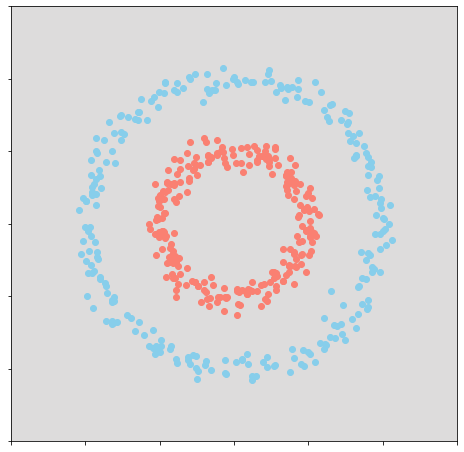

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

Step 0 / 1000 - Loss =  0.42347768 - Acc = 0.286
Step 25 / 1000 - Loss =  0.3954177 - Acc = 0.36
Step 50 / 1000 - Loss =  0.3812329 - Acc = 0.406
Step 75 / 1000 - Loss =  0.37146217 - Acc = 0.416
Step 100 / 1000 - Loss =  0.3634697 - Acc = 0.416
Step 125 / 1000 - Loss =  0.35592845 - Acc = 0.418
Step 150 / 1000 - Loss =  0.34730306 - Acc = 0.426
Step 175 / 1000 - Loss =  0.33452603 - Acc = 0.438
Step 200 / 1000 - Loss =  0.31069994 - Acc = 0.422
Step 225 / 1000 - Loss =  0.27398115 - Acc = 0.38
Step 250 / 1000 - Loss =  0.24993335 - Acc = 0.5
Step 275 / 1000 - Loss =  0.23791035 - Acc = 0.5
Step 300 / 1000 - Loss =  0.23059799 - Acc = 0.5
Step 325 / 1000 - Loss =  0.22511348 - Acc = 0.5
Step 350 / 1000 - Loss =  0.22043237 - Acc = 0.5
Step 375 / 1000 - Loss =  0.21624334 - Acc = 0.5
Step 400 / 1000 - Loss =  0.21244003 - Acc = 0.624
Step 425 / 1000 - Loss =  0.20893507 - Acc = 0.682
Step 450 / 1000 - Loss =  0.2056023 - Acc = 0.712
Step 475 / 1000 - Loss =  0.20237052 - Acc = 0.742
Ste

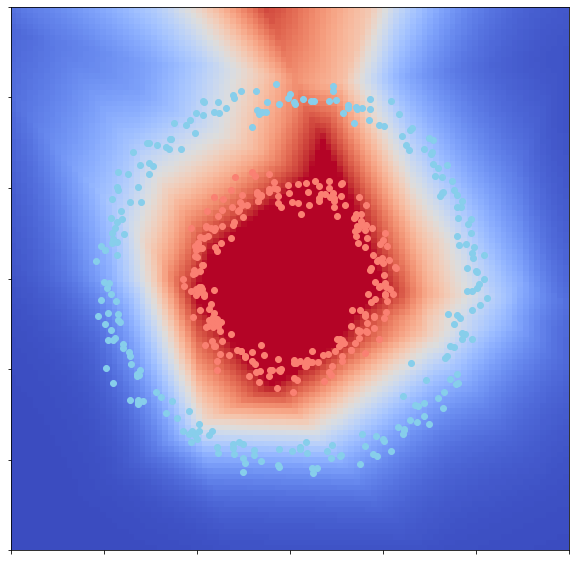

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
#x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

## Keras

In [6]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 227us/sample - loss: 0.2668 - acc: 0.5040
Epoch 2/100
500/500 [==============================] - 0s 49us/sample - loss: 0.2641 - acc: 0.4780
Epoch 3/100
500/500 [==============================] - 0s 46us/sample - loss: 0.2616 - acc: 0.4600
Epoch 4/100
500/500 [==============================] - 0s 51us/sample - loss: 0.2595 - acc: 0.4380
Epoch 5/100
500/500 [==============================] - 0s 49us/sample - loss: 0.2577 - acc: 0.4300
Epoch 6/100
500/500 [==============================] - 0s 50us/sample - loss: 0.2560 - acc: 0.4040
Epoch 7/100
500/500 [==============================] - 0s 63us/sample - loss: 0.2545 - acc: 0.4060
Epoch 8/100
500/500 [==============================] - 0s 54us/sample - loss: 0.2531 - acc: 0.4220
Epoch 9/100
500/500 [==============================] - 0s 58us/sample - loss: 0.2516 - acc: 0.4020
Epoch 10/100
500/500 [==============================] - 0s 56us/sample - loss: 0.2502 -

## Sklearn

In [7]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.21047390
Iteration 2, loss = 0.14196418
Iteration 3, loss = 0.12163958
Iteration 4, loss = 0.11366242
Iteration 5, loss = 0.10600121
Iteration 6, loss = 0.09951111
Iteration 7, loss = 0.09418002
Iteration 8, loss = 0.09009312
Iteration 9, loss = 0.08774664
Iteration 10, loss = 0.08503134
Iteration 11, loss = 0.08216273
Iteration 12, loss = 0.07873089
Iteration 13, loss = 0.07691952
Iteration 14, loss = 0.07312386
Iteration 15, loss = 0.06979552
Iteration 16, loss = 0.06640771
Iteration 17, loss = 0.06321328
Iteration 18, loss = 0.05974223
Iteration 19, loss = 0.05594523
Iteration 20, loss = 0.05130360
Iteration 21, loss = 0.04709451
Iteration 22, loss = 0.04201526
Iteration 23, loss = 0.03694974
Iteration 24, loss = 0.03218322
Iteration 25, loss = 0.02733927
Iteration 26, loss = 0.02289657
Iteration 27, loss = 0.01914647
Iteration 28, loss = 0.01568076
Iteration 29, loss = 0.01302406
Iteration 30, loss = 0.01113941
Iteration 31, loss = 0.00998238
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)